In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier

1.Провести повний аналіз даних.

In [3]:
#Завантажити датасет. Вивести перші 5 рядків.
mushrooms = pd.read_csv("mushroom_cleaned.csv")
mushrooms.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
#Вивести розмір датасету, наявність пропущених даних, типи даних.

mushrooms.shape

(54035, 9)

In [6]:
mushrooms.isnull().sum()


cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [7]:
mushrooms.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

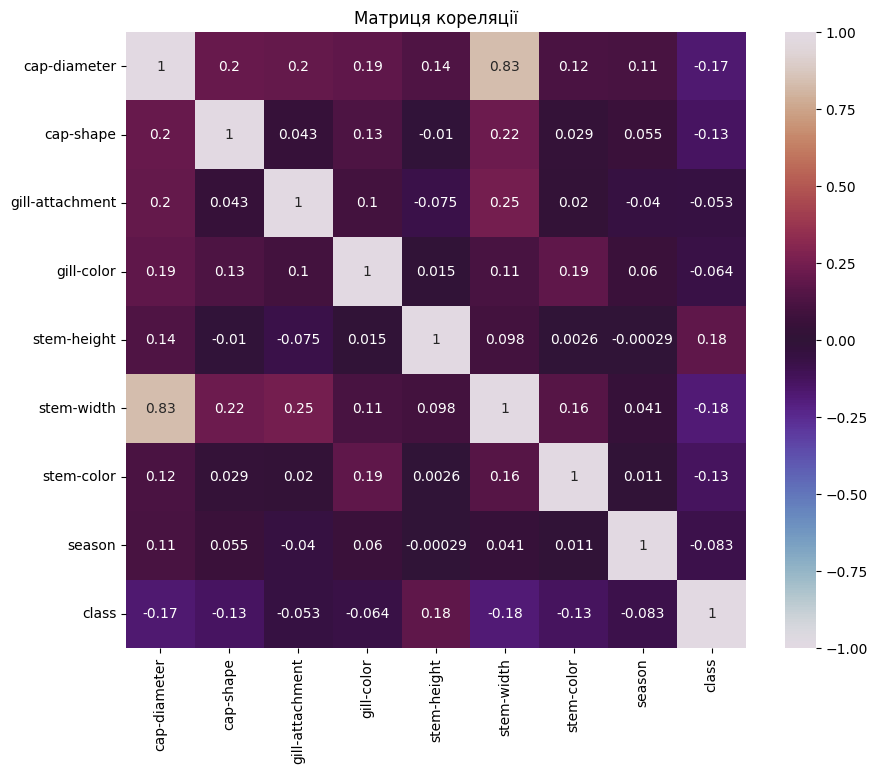

In [8]:
#Вивести матрицю кореляції.
correlation_matrix = mushrooms.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', vmin=-1, vmax=1, center=0)
plt.title('Матриця кореляції')
plt.show()

In [9]:
#Вивевести кореляцію із цільовою функцією.
correlation_with_target = mushrooms.corr()['class'].sort_values(ascending=False)
print(correlation_with_target)

class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64


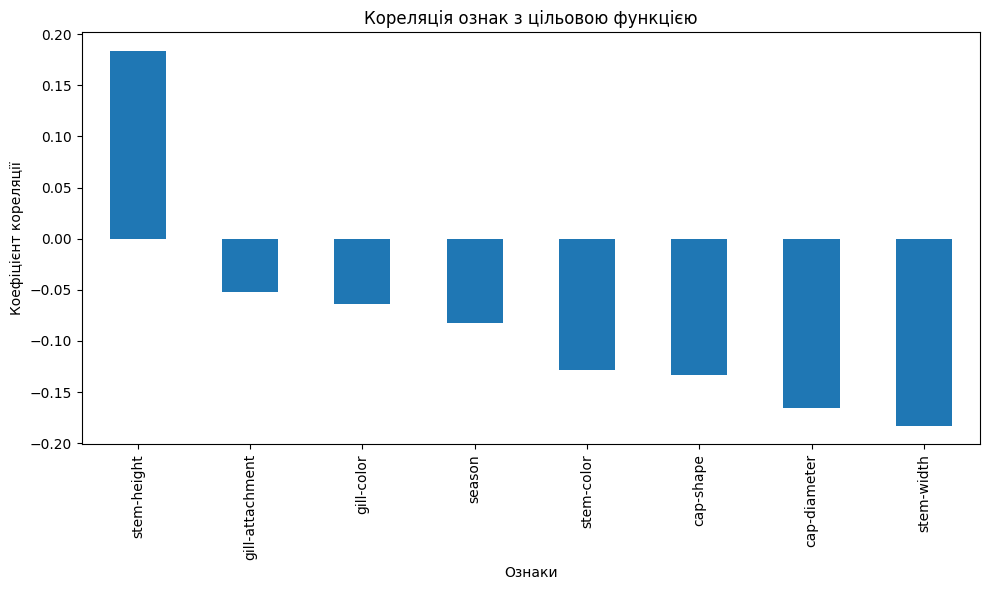

In [10]:
plt.figure(figsize=(10, 6))
correlation_with_target.drop('class').plot(kind='bar')
plt.title('Кореляція ознак з цільовою функцією')
plt.xlabel('Ознаки')
plt.ylabel('Коефіцієнт кореляції')
plt.tight_layout()
plt.show()

2. Побудувати дві моделі класифікації на вибір (наприклад, Випадковий ліс і логістичну регресію), підібрати параметри

In [13]:
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Випадковий ліс

In [14]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 20, 100],
              'max_features': ["log2", "sqrt"],
             'criterion': ["gini", "entropy"]}
rf = RandomForestClassifier(random_state = 42)
gs_rf = GridSearchCV(rf, param_grid, cv=5)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 100],
                         'max_features': ['log2', 'sqrt']})

In [15]:
print("Найкращі параметри:", gs_rf.best_params_)
print("Найкраща оцінка перехресної перевірки:", gs_rf.best_score_)

Найкращі параметри: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2'}
Найкраща оцінка перехресної перевірки: 0.9899139055667782


In [16]:
best_model = gs_rf.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Оцінка на тестовому наборі:", test_score)

Оцінка на тестовому наборі: 0.9909318034607199


Логістична регресія

In [17]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
lr = LogisticRegression(random_state=0)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [18]:
print("Найкращі параметри:", grid_search.best_params_)
print("Найкраща оцінка перехресної перевірки:", grid_search.best_score_)

Найкращі параметри: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Найкраща оцінка перехресної перевірки: 0.6353983581705558


Оцінка на тестовому наборі

In [19]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Оцінка на тестовому наборі:", test_score)

Оцінка на тестовому наборі: 0.6361617470158231


Вивести матрицю плутанини та класифікаційний звіт.(ВИПАДКОВИЙ ЛІС)

In [20]:
y_pred = gs_rf.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [21]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9909318034607199

Confusion Matrix:
[[4852   57]
 [  41 5857]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



Метод ліктя

In [22]:
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss_2d.append(kmeans.inertia_)

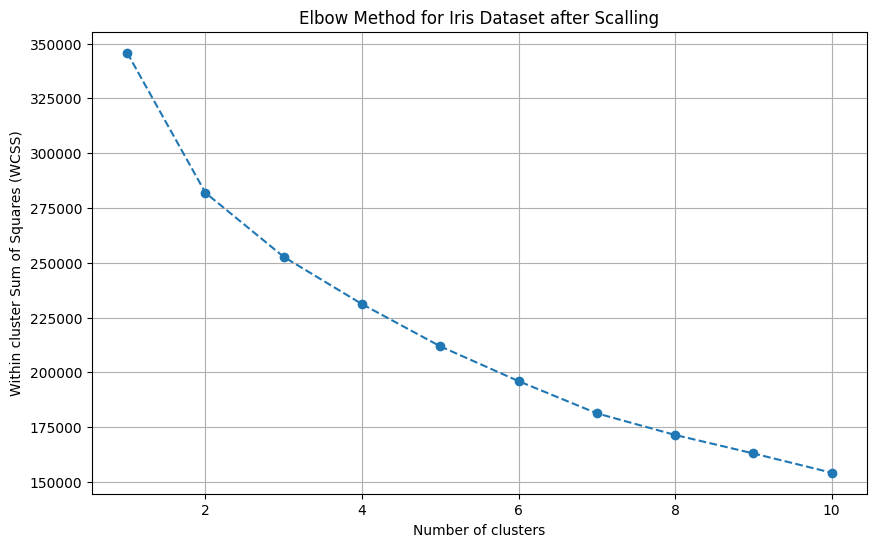

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method for Iris Dataset after Scalling')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

Метод силуетів

In [24]:
silhouette_scores = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

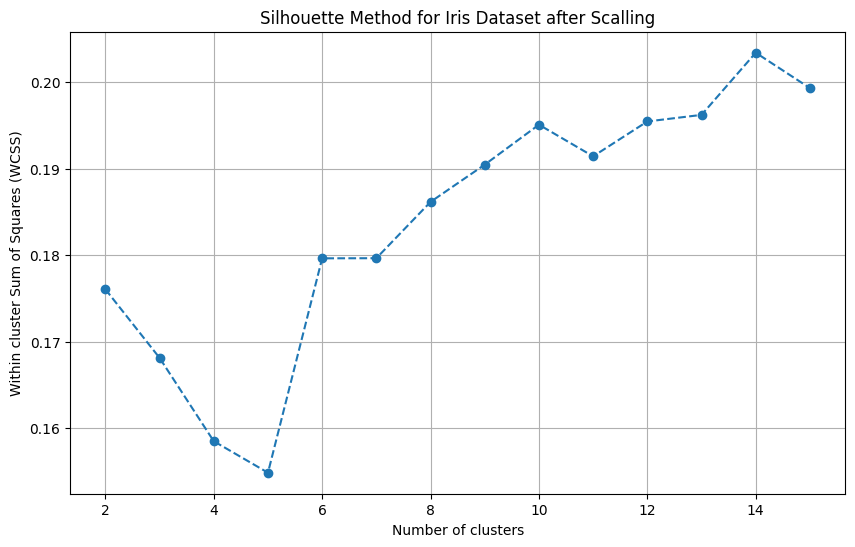

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 16), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Iris Dataset after Scalling')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

Візуалізація кластерів.

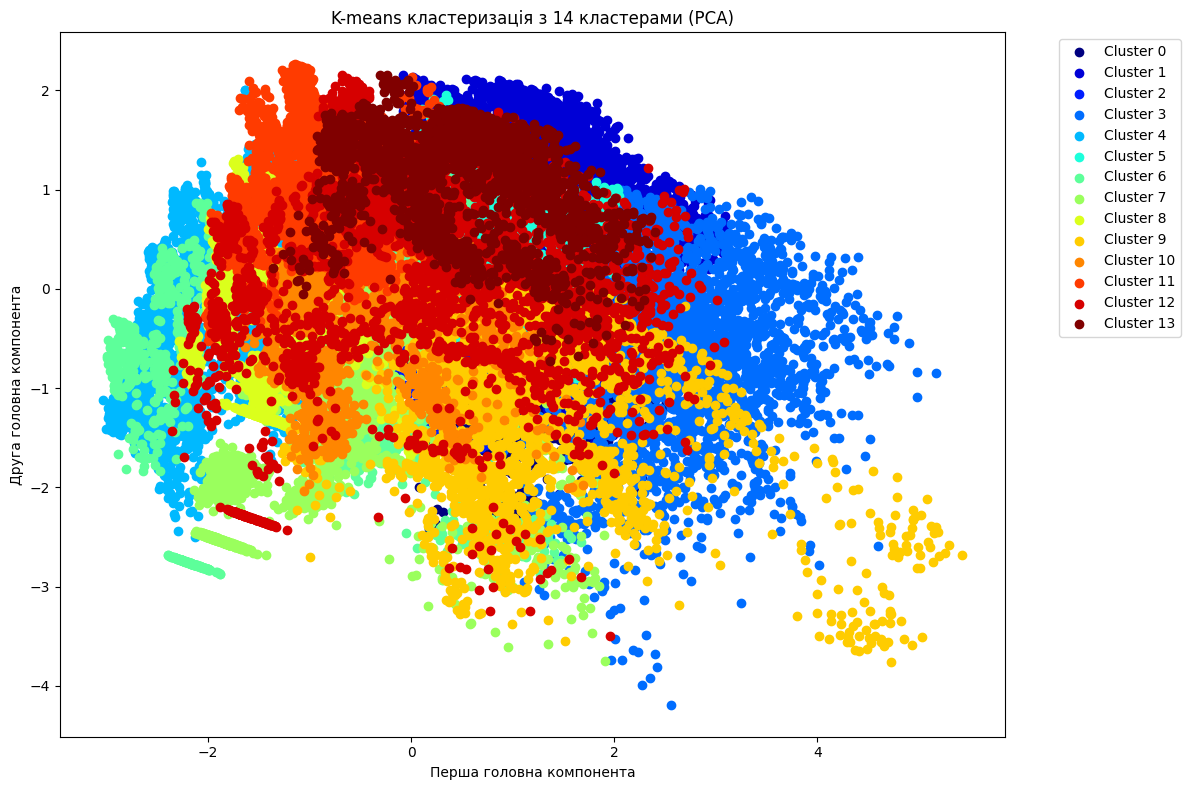

In [26]:
kmeans = KMeans(n_clusters=14, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
colors = plt.cm.jet(np.linspace(0, 1, 14))
plt.figure(figsize=(12, 8))
for i in range(14):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[i]], label=f'Cluster {i}')

plt.title('K-means кластеризація з 14 кластерами (PCA)')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

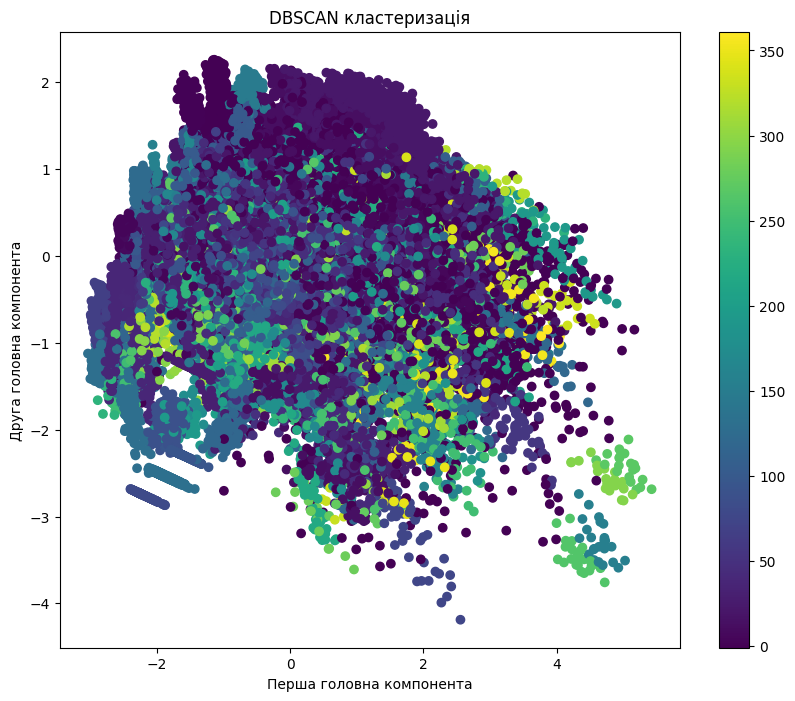

Кількість кластерів: 362


In [27]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ви можете змінювати ці параметри
dbscan_labels = dbscan.fit_predict(X_train)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')

plt.title('DBSCAN кластеризація')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.colorbar(scatter)
plt.show()

# Виводимо кількість кластерів
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Кількість кластерів: {n_clusters}")